# Problem Description

There are two all-star players in a basketball team.  
Whether All-star player 1 will show in the game depends on the knee and shoulder injury.  
Whether All-star player 2 will show in the game depends on the ankle and wrist injury.   
All the injuries will influence whether all-star players will go on the court or not.   
All-star player 1 has much more talent in getting points, so if he can show in the game, he will influence the offense and make it good.  
All-star player 2 has much more talent in denfensing opposing player, so if he can show in the game, he will influence the defense and make it good.  
Getting points may be due to offense, all-star player1 or all-star player2 none of them, or more than one of them.  
Lossing points may be due to deffense, all-star player1 or all-star player2 none of them, or more than one of them.   
  
Here are the variables:   

- $K$ : Knee has injury.
- $S$ : Shoulder has injury.
- $A$ : Ankle has injury.
- $W$ : Wrist has injury.
- $P1$ : All-star player1 will show in the game.
- $P2$ : All-star player2 will show in the game.
- $O$ : Offense of the team, 1 means good and 0 means bad.
- $D$ : Defense of the team, 1 means good and 0 means bad.
- $GP$ : Gettiing points of the team, 1 means getting high score and 0          means getting low score. Better offense, getting more points.
- $GP$ : Loosing points of the team, 1 means lossing less points and 0          means lossing many points. Loosing less and less points means          better defense of the team.  
  
and for simplicity:

- $E$ : either All-star player 1 or All-star player 2.  


Beside, we have the estimations of related conditional probabilities: 

| Variable | Conditional Probability (or Prior) | Variable | Conditional Probability (or Prior) |
|--------:|-------:|--------:|-------:|
| $K$ | $$P(K) = 0.2 $$ | $S$ | $$P(S) = 0.25$$ |
| $A$ | $$P(A) = 0.3 $$ | $W$ | $$P(W) = 0.15$$ |
| $P1$ | $$P(P1|K,S) = 0.01$$ | $P2$ | $$P(P2|A,W) = 0.03$$ |
| | $$P(P1|K,\bar{S}) = 0.05$$ | | $$P(P2|A,\bar{W}) = 0.06$$ |
| | $$P(P1|\bar{K},S) = 0.01$$ | | $$P(P2|\bar{A},W) = 0.15$$ |
| | $$P(P1|\bar{K},\bar{S}) = 0.99$$ | | $$P(P2|\bar{A},\bar{W}) =0.98$$ |
| $O$ | $$P(O|P1) = 0.95$$ | $E$ | $$P(E|P1,P2) = 1.00$$ |
| | $$P(O|\bar{P1}) = 0.2$$ | | $$P(E|P1,\bar{P2}) = 1.00$$ |
| $D$ | $$P(D|P2) = 0.97$$ | | $$P(E|\bar{P1},P2) = 1.00$$ |
| | $$P(D|\bar{P2}) = 0.1$$ | | $$P(E|\bar{P1},\bar{P2}) = 0.00$$ |
| $GP$ | $$P(GP|O,E) = 0.95$$ | $LP$ | $$P(LP|D,E) = 0.97$$ |
| | $$P(P1|O,\bar{E}) = 0.4$$ | | $$P(P2|O,\bar{E}) =0.6$$ |
| | $$P(P1|\bar{O},E) = 0.3$$ | | $$P(P2|\bar{O},E) =0.5$$ |
| | $$P(P1|\bar{O},\bar{E}) = 0.04$$ | | $$P(P2|\bar{O},\bar{E}) =0.08$$ |

Then, we have the belief network shown as follows:  
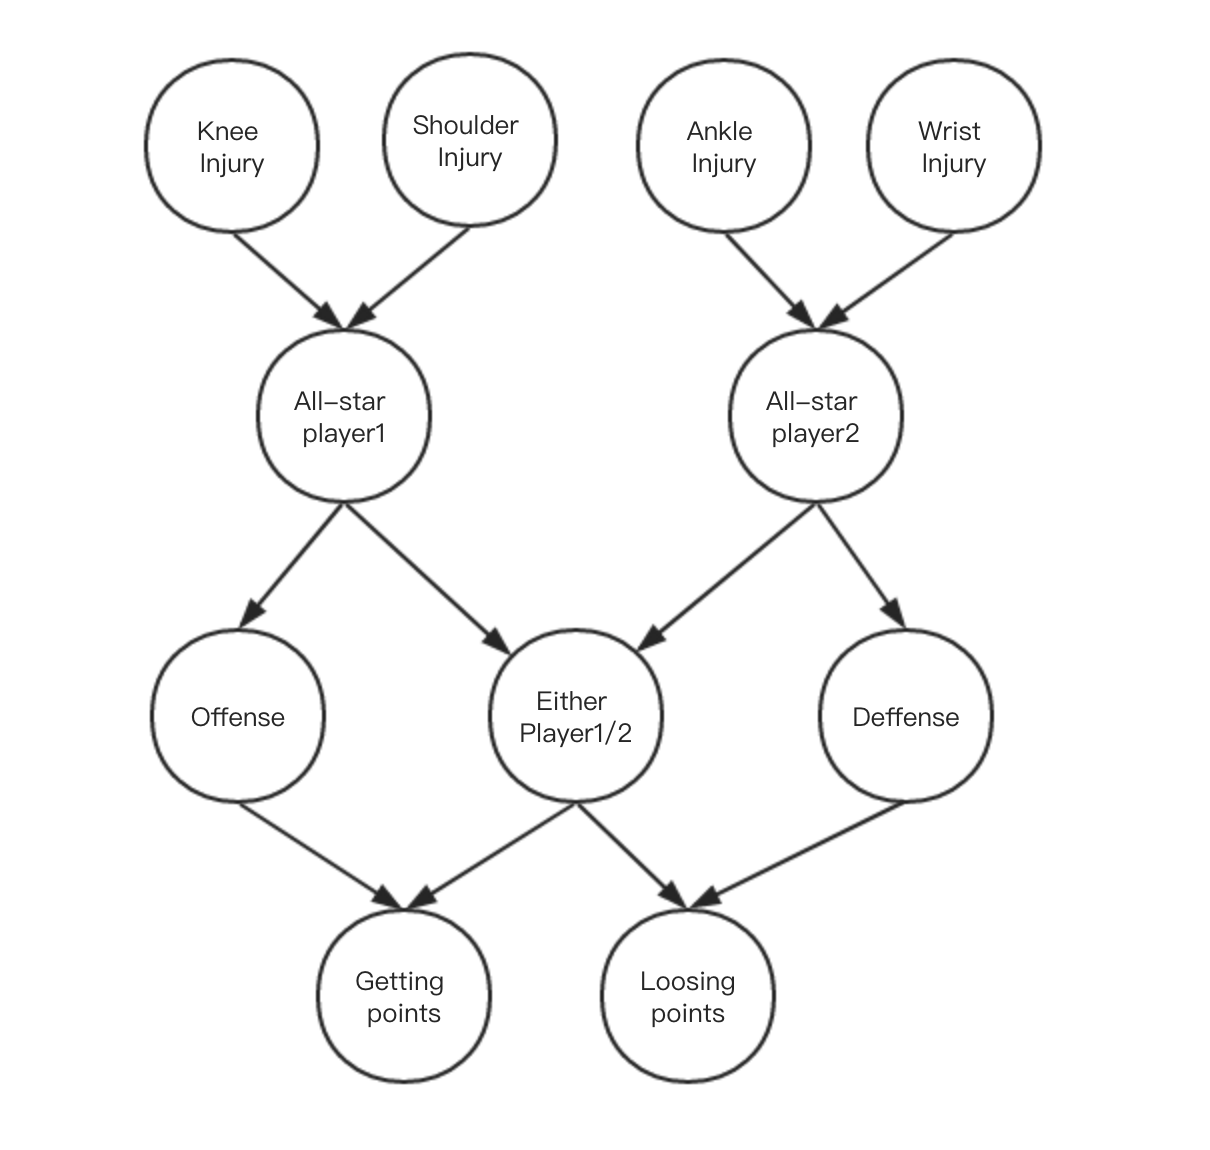

Now the team gets many points and doesn't lose many points, and journalist told that player 1 has knee injury and player 2 has ankle injury.  
We want to know the probabilities of all-star players showing in the game. And if we already know that player 1 doesn't show in the game, what the probability is of player 2 showing in the game. 

## Build the Model in Python

In [1]:
from pgmpy.models import BayesianModel as bysmodel
from pgmpy.factors.discrete import TabularCPD as tcpd

In [2]:
model = bysmodel([('K', 'P1'), ('S', 'P1'), ('A', 'P2'),('W', 'P2'),('P1', 'E'), ('P2', 'E'), 
                  ('P1', 'O'), ('P2', 'D'), ('E','GP'),('E','LP'),('O', 'GP'), ('D', 'LP')])

In [3]:
priorK = tcpd(variable='K', variable_card=2, values=[[0.8, 0.2]])
priorS = tcpd(variable='S', variable_card=2, values=[[0.7, 0.3]])
priorA = tcpd(variable='A', variable_card=2, values=[[0.75, 0.25]])
priorW = tcpd(variable='W', variable_card=2, values=[[0.85, 0.15]])

In [4]:
cpdP1 = tcpd(variable='P1', variable_card=2, 
            evidence=['K','S'], evidence_card=[2,2], 
            values=[[0.01,0.9,0.95,0.99],
                    [0.99,0.1,0.05,0.01]])
cpdP2 = tcpd(variable='P2', variable_card=2, 
            evidence=['A','W'], evidence_card=[2,2], 
            values=[[0.02,0.85,0.94,0.97],
                    [0.98,0.15,0.06,0.03]])
cpdE = tcpd(variable='E', variable_card=2, 
            evidence=['P1', 'P2'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdO = tcpd(variable='O', variable_card=2, 
            evidence=['P1'], evidence_card=[2], 
            values=[[0.8, 0.05],  
                    [0.2, 0.95]])
cpdD = tcpd(variable='D', variable_card=2, 
            evidence=['P2'], evidence_card=[2], 
            values=[[0.9, 0.03],  
                    [0.1, 0.97]])
cpdGP = tcpd(variable='GP', variable_card=2, 
            evidence=['O','E'], evidence_card=[2,2], 
            values=[[0.96,0.7,0.6,0.05], 
                    [0.04,0.3,0.4,0.95]])
cpdLP = tcpd(variable='LP', variable_card=2, 
            evidence=['D','E'], evidence_card=[2,2], 
            values=[[0.92,0.5,0.4,0.03], 
                    [0.08,0.5,0.6,0.97]])

In [5]:
# add probabilities to the model
model.add_cpds(priorK, priorS, priorA, priorW, cpdP1, cpdP2, cpdE, cpdO, cpdD, cpdGP, cpdLP)

In [6]:
# check consistency
model.check_model()

True

## Solve the Problem with Different Methods

### Variable Elimination

In [7]:
from pgmpy.inference import VariableElimination

VESolver = VariableElimination(model)

Chance of All-star player 1 and All-star player 2 :

In [8]:
print('All-star player 1 : %.1f%%' % (VESolver.query(['P1'], evidence={'LP' : 1,'GP':1, 'K' : 1,'A':1})['P1'].values[1] * 100))
print('All-star player 2 : %.1f%%' % (VESolver.query(['P2'], evidence={'LP' : 1, 'GP':1,'K' : 1,'A':1})['P2'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E'], evidence={'LP' : 1, 'GP':1,'K' : 1,'A':1})['E'].values[1] * 100))

All-star player 1 : 36.0%
All-star player 2 : 43.1%
Either One   : 75.7%


When All-star player 1 is ruled out

In [9]:
print('All-star player 2  : %.1f%%' % (VESolver.query(['P2'], evidence={'LP' : 1,'GP' : 1, 'K' : 1,'A':1,'P1':0})['P2'].values[1] * 100))

All-star player 2  : 62.0%


### Belief Propagation

In [10]:
from pgmpy.inference import BeliefPropagation

BPSolver = BeliefPropagation(model)

Chance of All-star player 1 and All-star player 2 :

In [11]:
BPSolver.calibrate()

In [12]:
print('All-star player 1 : %.1f%%' % (BPSolver.query(['P1'], evidence={'LP' : 1,'GP' : 1, 'K' : 1,'A':1})['P1'].values[1] * 100))
print('All-star player 2 : %.1f%%' % (BPSolver.query(['P2'], evidence={'LP' : 1,'GP' : 1, 'K' : 1,'A':1})['P2'].values[1] * 100))
print('Either One   : %.1f%%' % (BPSolver.query(['E'], evidence={'LP' : 1,'GP' : 1, 'K' : 1,'A':1})['E'].values[1] * 100))

All-star player 1 : 36.0%
All-star player 2 : 43.1%
Either One   : 75.7%


/anaconda3/lib/python3.5/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:673: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values


When All-star player 1 is ruled out

In [13]:
print('All-star player 2 : %.1f%%' % (BPSolver.query(['P2'], evidence={'LP' : 1,'GP' : 1, 'K' : 1,'A':1,'P1':0})['P2'].values[1] * 100))

All-star player 2 : 62.0%


/anaconda3/lib/python3.5/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:673: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values


### Bayesian Model Sampling

In [14]:
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling

SMPSolver = BayesianModelSampling(model)

nsamples = 1000
# case : player 1 has knee injury
evdDA  = [State('LP', 1),State('GP', 1), State('K', 1),State('A', 1)]
smpDA  = SMPSolver.rejection_sample(evidence=evdDA, size=nsamples)
# case : exclude player 1
evdDAT = [State('LP', 1),State('GP', 1), State('K', 1),State('A', 1),State('P1',0)]
smpDAT = SMPSolver.rejection_sample(evidence=evdDAT, size=nsamples)

In [15]:
from pandas.core.frame import DataFrame

def calcCondProb(trace, event, cond):
    if type(trace) is DataFrame:
        trace = trace.transpose().to_dict().values()
    # find all samples satisfy conditions
    for k, v in cond.items():
        trace = [smp for smp in trace if smp[k] == v]
    # record quantity of all samples fulfill condition
    nCondSample = len(trace)
    # find all samples satisfy event
    for k, v in event.items():
        trace = [smp for smp in trace if smp[k] == v]
    # calculate conditional probability
    return len(trace) / nCondSample

Now, we can count each sample to get estimation of probabilities:

In [16]:
print('All-star player 1 : %.1f%%' % (calcCondProb(smpDA, {'P1' : 1}, {}) * 100))
print('All-star player 2  : %.1f%%' % (calcCondProb(smpDA, {'P2' : 1}, {}) * 100))
print('Either One   : %.1f%%' % (calcCondProb(smpDA, {'E' : 1}, {}) * 100))

All-star player 1 : 36.3%
All-star player 2  : 43.1%
Either One   : 76.4%


When All-star player 1 is ruled out:

In [17]:
print('All-star player 2  : %.1f%%' % (calcCondProb(smpDAT, {'P2' : 1}, {}) * 100))

All-star player 2  : 59.8%


In conclusion, the results of Variable Elimination and Belief Propagation are same and these twp method use less time than Bayesian Model Sampling. Because Bayesian Model Sampling needs to sampling, so the Bayesian Model Sampling method needs much more time. 